### **Problem #1**

*   Apply only **logistic regression** for the **NumtaDB** dataset and build a multiclass classification model that can recognize `[0-9]` Bengali handwritten digits with different hyperparameter settings.  

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import numpy as np
from matplotlib import pyplot as plt

import os
print(os.listdir("/content/gdrive/My Drive/NamtaDB"))


['testing-a', 'testing-all-corrected', 'testing-auga', 'testing-augc', 'testing-b', 'testing-c', 'testing-d', 'testing-e', 'testing-f', 'training-a', 'training-a.csv', 'training-b', 'training-b.csv', 'training-c', 'training-c.csv', 'training-d', 'training-d.csv', 'training-e', 'training-e.csv']


In [ ]:
PATH = '/content/gdrive/My Drive/NamtaDB/'
os.listdir(PATH)

['testing-a',
 'testing-all-corrected',
 'testing-auga',
 'testing-augc',
 'testing-b',
 'testing-c',
 'testing-d',
 'testing-e',
 'testing-f',
 'training-a',
 'training-a.csv',
 'training-b',
 'training-b.csv',
 'training-c',
 'training-c.csv',
 'training-d',
 'training-d.csv',
 'training-e',
 'training-e.csv']

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('training-a.csv')
b_csv = showRawTrainingSamples('training-b.csv')
c_csv = showRawTrainingSamples('training-c.csv')
d_csv = showRawTrainingSamples('training-d.csv')
e_csv = showRawTrainingSamples('training-e.csv')


training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-b.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')
training-e.csv
Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')


In [ ]:
#here i make a function for taking filename and digit from csv file.
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
b_csv = dropColumns(b_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)
e_csv = dropColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
       filename  digit
0    b00000.png      0
1    b00001.png      2
2    b00002.png      5
3    b00003.png      2
4    b00004.png      5
..          ...    ...
354  b00354.png      5
355  b00355.png      9
356  b00356.png      2
357  b00357.png      1
358  b00358.png      2

[359 rows x 2 columns]
     filename  digit
0  b00000.png      0
1  b00001.png      2
2  b00002.png      5
3  b00003.png      2
4  b00004.png      5
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png     

In [ ]:
a_csv = pd.read_csv('/content/gdrive/My Drive/NamtaDB/training-a.csv')
a_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [ ]:
a_csv = a_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
a_csv.iloc[:15, 0:]

,filename,digit
0,a00000.png,5
1,a00001.png,3
2,a00002.png,1
3,a00003.png,7
4,a00004.png,0
5,a00005.png,4
6,a00006.png,3
7,a00007.png,0
8,a00008.png,4
9,a00009.png,9


In [ ]:
b_csv = pd.read_csv('/content/gdrive/My Drive/NamtaDB/training-b.csv')
b_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [ ]:
b_csv = b_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
b_csv.iloc[:15, 0:]

,filename,digit
0,b00000.png,0
1,b00001.png,2
2,b00002.png,5
3,b00003.png,2
4,b00004.png,5
5,b00005.png,5
6,b00006.png,4
7,b00007.png,6
8,b00008.png,9
9,b00009.png,7


In [ ]:
c_csv = pd.read_csv('/content/gdrive/My Drive/NamtaDB/training-c.csv')
c_csv.columns

Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')

In [ ]:
c_csv = c_csv.drop(columns=['original filename', 'scanid',
       'database name original', 'contributing team', 'database name'])
c_csv.iloc[:15, 0:]

,filename,digit
0,c00000.png,6
1,c00001.png,1
2,c00002.png,3
3,c00003.png,2
4,c00004.png,7
5,c00005.png,3
6,c00006.png,4
7,c00007.png,7
8,c00008.png,5
9,c00009.png,3


In [ ]:
d_csv = pd.read_csv('/content/gdrive/My Drive/NamtaDB/training-d.csv')
d_csv.columns

Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')

In [ ]:
d_csv = d_csv.drop(columns=['original filename', 'scanid',
       'database name original','num', 'database name'])
d_csv.iloc[:15, 0:]

,digit,filename
0,1,d00000.png
1,1,d00001.png
2,5,d00002.png
3,7,d00003.png
4,0,d00004.png
5,1,d00005.png
6,0,d00006.png
7,0,d00007.png
8,3,d00008.png
9,7,d00009.png


In [ ]:
D_columns_titles = ['filename', 'digit']
d_csv = d_csv.reindex(columns = D_columns_titles)
d_csv.iloc[:15, 0:]

,filename,digit
0,d00000.png,1
1,d00001.png,1
2,d00002.png,5
3,d00003.png,7
4,d00004.png,0
5,d00005.png,1
6,d00006.png,0
7,d00007.png,0
8,d00008.png,3
9,d00009.png,7


In [ ]:
e_csv = pd.read_csv('/content/gdrive/My Drive/NamtaDB/training-e.csv')
e_csv.columns

Index(['filename', 'original filename', 'districtid', 'institutionid',
       'gender', 'age', 'datestamp', 'scanid', 'digit',
       'database name original', 'database name'],
      dtype='object')

In [ ]:
e_csv = e_csv.drop(columns=['original filename','districtid','institutionid','gender','age','datestamp','database name original','scanid','database name'])
e_csv.iloc[:15, 0:]

,filename,digit
0,e00000.png,9
1,e00001.png,9
2,e00002.png,0
3,e00003.png,4
4,e00004.png,5
5,e00005.png,6
6,e00006.png,3
7,e00007.png,0
8,e00008.png,4
9,e00009.png,3


Here I merged the 5 csv file into one file.

In [ ]:
total_csv = [a_csv,b_csv, c_csv, d_csv,e_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

72045


In [ ]:
TRAIN_PATH = '/content/gdrive/My Drive/NamtaDB/train'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
    src = PATH + folder_name + '/'
    dir_folders = os.listdir(src)
    for dir_name in dir_folders:
        file_name = os.path.join(src, dir_name)
        if os.path.isfile(file_name):
            shutil.copy(file_name, TRAIN_PATH) 

In [ ]:
processImages('training-a')
print('A Done')
processImages('training-b')
print('B Done')
processImages('training-c')
print('C Done')
processImages('training-d')
print('D Done')
processImages('training-e')
print('E Done')

A Done
B Done
C Done
D Done
E Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize((28,28)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize((28,28)),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  72045


In [ ]:
# Hyperparameters setting 1
# here i take batch size 64,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.001 and number of epochs 5.
batch_size = 64
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001
num_epochs = int(5)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:1014
Test dataloader:113


In [ ]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        logits  = self.linear(x)
        probas = F.softmax(logits, dim=1)
        return logits, probas

In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
Iteration: 500. Loss: 2.2015676498413086. Accuracy: 18.933925596890617
Iteration: 1000. Loss: 2.22872257232666. Accuracy: 23.52859522487507
1
Iteration: 1500. Loss: 2.028140068054199. Accuracy: 24.764019988895058
Iteration: 2000. Loss: 2.1287338733673096. Accuracy: 25.735702387562466
2
Iteration: 2500. Loss: 1.9706476926803589. Accuracy: 27.470849528039977
Iteration: 3000. Loss: 1.984222412109375. Accuracy: 27.63742365352582
3
Iteration: 3500. Loss: 1.9988902807235718. Accuracy: 27.887284841754582
Iteration: 4000. Loss: 2.031585454940796. Accuracy: 28.470294280955024
4
Iteration: 4500. Loss: 1.8358056545257568. Accuracy: 28.123264852859524
Iteration: 5000. Loss: 1.9742591381072998. Accuracy: 29.997223764575235


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model1.pkl') 

[2.2015676498413086, 2.22872257232666, 2.028140068054199, 2.1287338733673096, 1.9706476926803589, 1.984222412109375, 1.9988902807235718, 2.031585454940796, 1.8358056545257568, 1.9742591381072998]


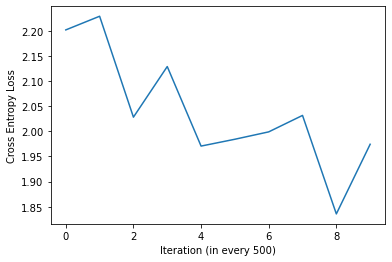

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 2
# here i take batch size 100,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.001 and number of epochs 5.
batch_size = 100
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001
num_epochs = int(5)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:649
Test dataloader:73


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
Iteration: 500. Loss: 2.2691783905029297. Accuracy: 17.892837312604108
1
Iteration: 1000. Loss: 2.1983869075775146. Accuracy: 22.529150471960023
2
Iteration: 1500. Loss: 2.1276187896728516. Accuracy: 24.097723486951693
3
Iteration: 2000. Loss: 2.021664619445801. Accuracy: 24.416990560799555
Iteration: 2500. Loss: 2.058455228805542. Accuracy: 25.888395335924486
4
Iteration: 3000. Loss: 1.9959750175476074. Accuracy: 26.860077734591894


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model2.pkl') 

[2.2691783905029297, 2.1983869075775146, 2.1276187896728516, 2.021664619445801, 2.058455228805542, 1.9959750175476074]


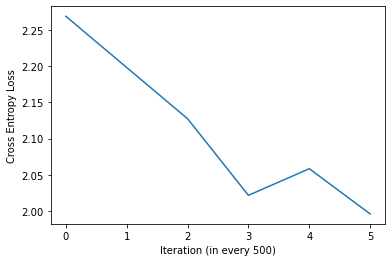

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 3
# here i take batch size 64,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.0001 and number of epochs 5.
batch_size = 100
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001
num_epochs = int(5)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:649
Test dataloader:73


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
Iteration: 500. Loss: 2.3110997676849365. Accuracy: 11.687951138256524
1
Iteration: 1000. Loss: 2.287186622619629. Accuracy: 12.382009994447529
2
Iteration: 1500. Loss: 2.2307519912719727. Accuracy: 13.77012770682954
3
Iteration: 2000. Loss: 2.2809886932373047. Accuracy: 14.991671293725707
Iteration: 2500. Loss: 2.197176456451416. Accuracy: 15.574680732926153
4
Iteration: 3000. Loss: 2.235475540161133. Accuracy: 16.67129372570794


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model3.pkl') 

[2.3110997676849365, 2.287186622619629, 2.2307519912719727, 2.2809886932373047, 2.197176456451416, 2.235475540161133]


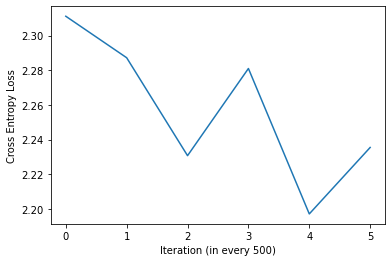

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 4
# here i take batch size 100,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.001 and number of epochs 15.
batch_size = 100
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:649
Test dataloader:73


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
Iteration: 500. Loss: 2.3359694480895996. Accuracy: 9.994447529150472
1
Iteration: 1000. Loss: 2.3197431564331055. Accuracy: 10.730149916712937
2
Iteration: 1500. Loss: 2.3051493167877197. Accuracy: 11.340921710161021
3
Iteration: 2000. Loss: 2.2901713848114014. Accuracy: 12.965019433647972
Iteration: 2500. Loss: 2.243507146835327. Accuracy: 14.630760688506385
4
Iteration: 3000. Loss: 2.2629690170288086. Accuracy: 15.782898389783453
5
Iteration: 3500. Loss: 2.1853678226470947. Accuracy: 16.5741254858412
6
Iteration: 4000. Loss: 2.219459295272827. Accuracy: 17.656857301499166
Iteration: 4500. Loss: 2.192821741104126. Accuracy: 18.267629094947253
7
Iteration: 5000. Loss: 2.227369546890259. Accuracy: 18.878400888395337
8
Iteration: 5500. Loss: 2.1800620555877686. Accuracy: 19.53081621321488
9
Iteration: 6000. Loss: 2.2018914222717285. Accuracy: 20.238756246529707
10
Iteration: 6500. Loss: 2.1517128944396973. Accuracy: 20.94669627984453
Iteration: 7000. Loss: 2.1926164627075195. Accuracy

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model4.pkl') 

[2.3359694480895996, 2.3197431564331055, 2.3051493167877197, 2.2901713848114014, 2.243507146835327, 2.2629690170288086, 2.1853678226470947, 2.219459295272827, 2.192821741104126, 2.227369546890259, 2.1800620555877686, 2.2018914222717285, 2.1517128944396973, 2.1926164627075195, 2.142092704772949, 2.1768765449523926, 2.1889350414276123, 2.180769920349121, 2.108374834060669]


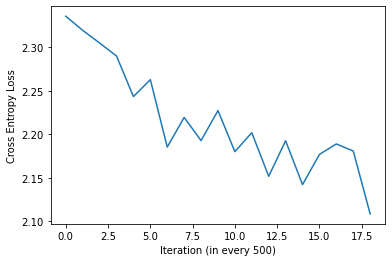

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 5
# here i take batch size 32,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.001 and number of epochs 15.
batch_size = 32
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:2027
Test dataloader:226


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
Iteration: 500. Loss: 2.3828108310699463. Accuracy: 8.953359244863965
Iteration: 1000. Loss: 2.282559633255005. Accuracy: 10.091615769017213
Iteration: 1500. Loss: 2.2905383110046387. Accuracy: 10.702387562465297
Iteration: 2000. Loss: 2.2498223781585693. Accuracy: 11.687951138256524
1
Iteration: 2500. Loss: 2.1898233890533447. Accuracy: 13.034425319267074
Iteration: 3000. Loss: 2.2383785247802734. Accuracy: 13.82565241532482
Iteration: 3500. Loss: 2.2975094318389893. Accuracy: 14.255968906163243
Iteration: 4000. Loss: 2.1829185485839844. Accuracy: 15.741254858411994
2
Iteration: 4500. Loss: 2.073547601699829. Accuracy: 17.101610216546362
Iteration: 5000. Loss: 2.117353677749634. Accuracy: 17.892837312604108
Iteration: 5500. Loss: 2.175448417663574. Accuracy: 17.504164353137146
Iteration: 6000. Loss: 2.236600160598755. Accuracy: 19.031093836757357
3
Iteration: 6500. Loss: 2.108600378036499. Accuracy: 19.044975013881178
Iteration: 7000. Loss: 2.234562635421753. Accuracy: 19.6835091615

In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model5.pkl') 

[2.3828108310699463, 2.282559633255005, 2.2905383110046387, 2.2498223781585693, 2.1898233890533447, 2.2383785247802734, 2.2975094318389893, 2.1829185485839844, 2.073547601699829, 2.117353677749634, 2.175448417663574, 2.236600160598755, 2.108600378036499, 2.234562635421753, 2.1723592281341553, 2.14898681640625, 2.1586360931396484, 2.1188642978668213, 2.0628740787506104, 2.207984447479248, 2.121852397918701, 2.045753002166748, 2.0530848503112793, 2.1378259658813477, 2.0468356609344482, 2.2049505710601807, 2.229640245437622, 2.1329293251037598, 2.1379387378692627, 2.01102614402771, 2.031665086746216, 2.155240058898926, 2.0701606273651123, 2.160151481628418, 2.129347562789917, 1.9786357879638672, 2.1342177391052246, 1.8018203973770142, 2.1093664169311523, 1.8962132930755615, 1.9511693716049194, 2.0683367252349854, 1.9938572645187378, 2.0722529888153076, 1.9497774839401245, 2.0774917602539062, 2.153376579284668, 2.092041015625, 2.033468008041382, 1.8503210544586182, 1.9652873277664185, 1.96

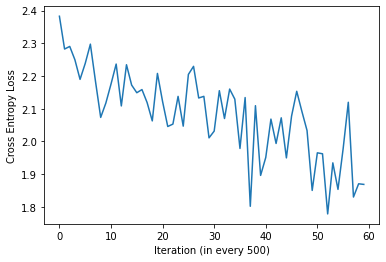

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 6
# here i take batch size 200,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.001 and number of epochs 15.
batch_size = 200
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:325
Test dataloader:37


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 2.3428592681884766. Accuracy: 10.494169905607995
2
3
Iteration: 1000. Loss: 2.295673370361328. Accuracy: 10.938367573570238
4
Iteration: 1500. Loss: 2.2927603721618652. Accuracy: 12.173792337590228
5
6
Iteration: 2000. Loss: 2.277794122695923. Accuracy: 13.520266518600778
7
Iteration: 2500. Loss: 2.2481184005737305. Accuracy: 14.464186563020544
8
9
Iteration: 3000. Loss: 2.2533528804779053. Accuracy: 15.505274847307051
10
Iteration: 3500. Loss: 2.2418816089630127. Accuracy: 16.5047196002221
11
12
Iteration: 4000. Loss: 2.2268900871276855. Accuracy: 17.143253747917825
13
Iteration: 4500. Loss: 2.223447322845459. Accuracy: 18.22598556357579
14


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model6.pkl') 

[2.3428592681884766, 2.295673370361328, 2.2927603721618652, 2.277794122695923, 2.2481184005737305, 2.2533528804779053, 2.2418816089630127, 2.2268900871276855, 2.223447322845459]


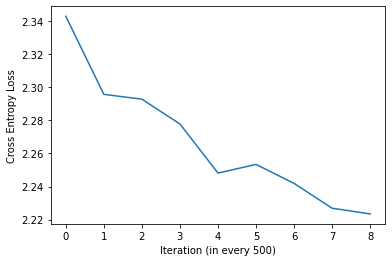

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 7
# here i take batch size 256,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.0001 and number of epochs 15.
batch_size = 256
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:254
Test dataloader:29


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 2.0311360359191895. Accuracy: 25.347029428095503
2
3
Iteration: 1000. Loss: 1.9153038263320923. Accuracy: 31.399222654081065
4
5
Iteration: 1500. Loss: 1.9527558088302612. Accuracy: 30.49694614103276
6
7
Iteration: 2000. Loss: 1.9518731832504272. Accuracy: 33.814547473625765
8
9
Iteration: 2500. Loss: 1.8942816257476807. Accuracy: 35.980011104941696
10
11
Iteration: 3000. Loss: 1.8271476030349731. Accuracy: 37.57634647418101
12
13
Iteration: 3500. Loss: 1.909185528755188. Accuracy: 37.38200999444753
14


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model7.pkl') 

[2.0311360359191895, 1.9153038263320923, 1.9527558088302612, 1.9518731832504272, 1.8942816257476807, 1.8271476030349731, 1.909185528755188]


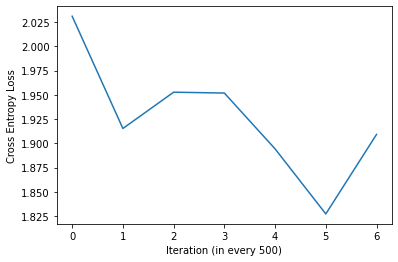

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 8
# here i take batch size 256,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.001 and number of epochs 15.
batch_size = 256
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.001
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:254
Test dataloader:29


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.9379525184631348. Accuracy: 33.78678511937812
2
3
Iteration: 1000. Loss: 1.797506332397461. Accuracy: 38.3259300388673
4
5
Iteration: 1500. Loss: 1.8201409578323364. Accuracy: 39.228206551915605
6
7
Iteration: 2000. Loss: 1.7025370597839355. Accuracy: 39.2976124375347
8
9
Iteration: 2500. Loss: 1.7382293939590454. Accuracy: 38.52026651860078
10
11
Iteration: 3000. Loss: 1.8034796714782715. Accuracy: 42.79566907273737
12
13
Iteration: 3500. Loss: 1.7937020063400269. Accuracy: 39.07551360355358
14


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model8.pkl') 

[1.9379525184631348, 1.797506332397461, 1.8201409578323364, 1.7025370597839355, 1.7382293939590454, 1.8034796714782715, 1.7937020063400269]


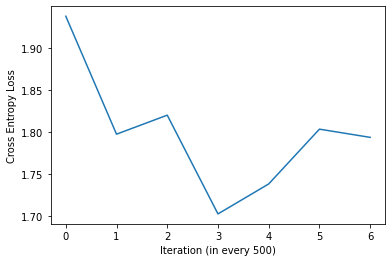

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 9
# here i take batch size 256,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.0005 and number of epochs 15.
batch_size = 256
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0005
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:254
Test dataloader:29


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
Iteration: 500. Loss: 1.8853522539138794. Accuracy: 31.204886174347585
2
3
Iteration: 1000. Loss: 1.8893365859985352. Accuracy: 35.7023875624653
4
5
Iteration: 1500. Loss: 1.7191168069839478. Accuracy: 38.173237090505275
6
7
Iteration: 2000. Loss: 1.8112187385559082. Accuracy: 38.589672404219876
8
9
Iteration: 2500. Loss: 1.8147915601730347. Accuracy: 37.992781787895616
10
11
Iteration: 3000. Loss: 1.7493596076965332. Accuracy: 38.86729594669628
12
13
Iteration: 3500. Loss: 1.8244837522506714. Accuracy: 39.214325374791784
14


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model9.pkl') 

[1.8853522539138794, 1.8893365859985352, 1.7191168069839478, 1.8112187385559082, 1.8147915601730347, 1.7493596076965332, 1.8244837522506714]


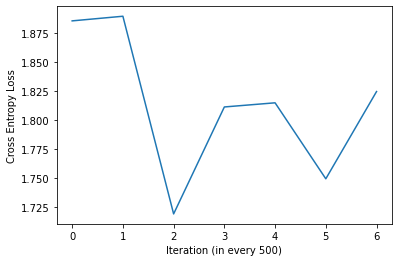

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

In [ ]:
# Hyperparameters for setting 10
# here i take batch size 512,number of iteration 1000,input dimension 28*28,output dimension 10 as this is a multiclass clasification,learning rate 0.0001 and number of epochs 15.
batch_size = 512
num_iters = 1000
input_dim = 28*28 # num_features = 784
output_dim = 10

learning_rate = 0.0001
num_epochs = int(15)

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))


Train dataloader:127
Test dataloader:15


In [ ]:
'''
INSTANTIATE MODEL CLASS
'''
model = LogisticRegressionModel(input_size=input_dim,
                                num_classes=output_dim)
# To enable GPU
model.to(device)

LogisticRegressionModel(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

In [ ]:
# INSTANTIATE OPTIMIZER CLASS
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
'''
TRAIN THE MODEL
'''
iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    print(epoch)
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        logits, probas = model(images) 

        # Calculate Loss: PyTorch implementation of CrossEntropyLoss works with logits, not probabilities
        loss = F.cross_entropy(logits, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                logits, probas = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(probas, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

0
1
2
3
Iteration: 500. Loss: 2.0274624824523926. Accuracy: 28.484175458078845
4
5
6
7
Iteration: 1000. Loss: 1.9030672311782837. Accuracy: 29.608550805108273
8
9
10
11
Iteration: 1500. Loss: 1.9552994966506958. Accuracy: 33.30094392004442
12
13
14


In [ ]:
save_model = True

if save_model is True:
    # Saves only parameters
    # wights & biases
    torch.save(model.state_dict(), '/content/gdrive/My Drive/NamtaDB/model/model10.pkl') 

[2.0274624824523926, 1.9030672311782837, 1.9552994966506958]


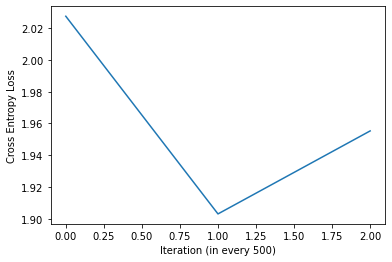

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

Here I take num_iteration 1000 for all the settings and input dimention 28*28 = 784 with output dimention 10 and num_epoch vary from 5 to 15.

**Settings Table:-**

| Settings| Batch Size      | Learning Rate |  Optimzer |  Accuracy(%)|
|:--------:| :----------: | : -----------:|:-----:      |:-----------:|
| 1        | 64          | 0.001        |  SGD    |  29.99    |
| 2        | 100          | 0.001        |  SGD    |  26.86  |
| 3        | 100          | 0.0001        |  SGD   |  16.67     |
| 4        | 100          | 0.0001        |  SGD   |  23.23     |
| 5        | 32          | 0.0001         |  SGD    |  26.04     |
| 6        | 200          | 0.0001         |  SGD    |  18.22     |
| 7        | 256          | 0.0001         |  ADAM    |  37.38     |
| 8        | 256          | 0.001         |  ADAM    |  39.07     |
| 9        | 256          | 0.0005         |  ADAM    |  39.21     |
| 10        | 512          | 0.0001         |  ADAM    |  33.30     |


From the table it can be seen that I got the highst accuracy for the NamtaDB dataset is 39.21 for the setting 9.


Here I show the loss curve for setting 1 to 10 setting respectively.

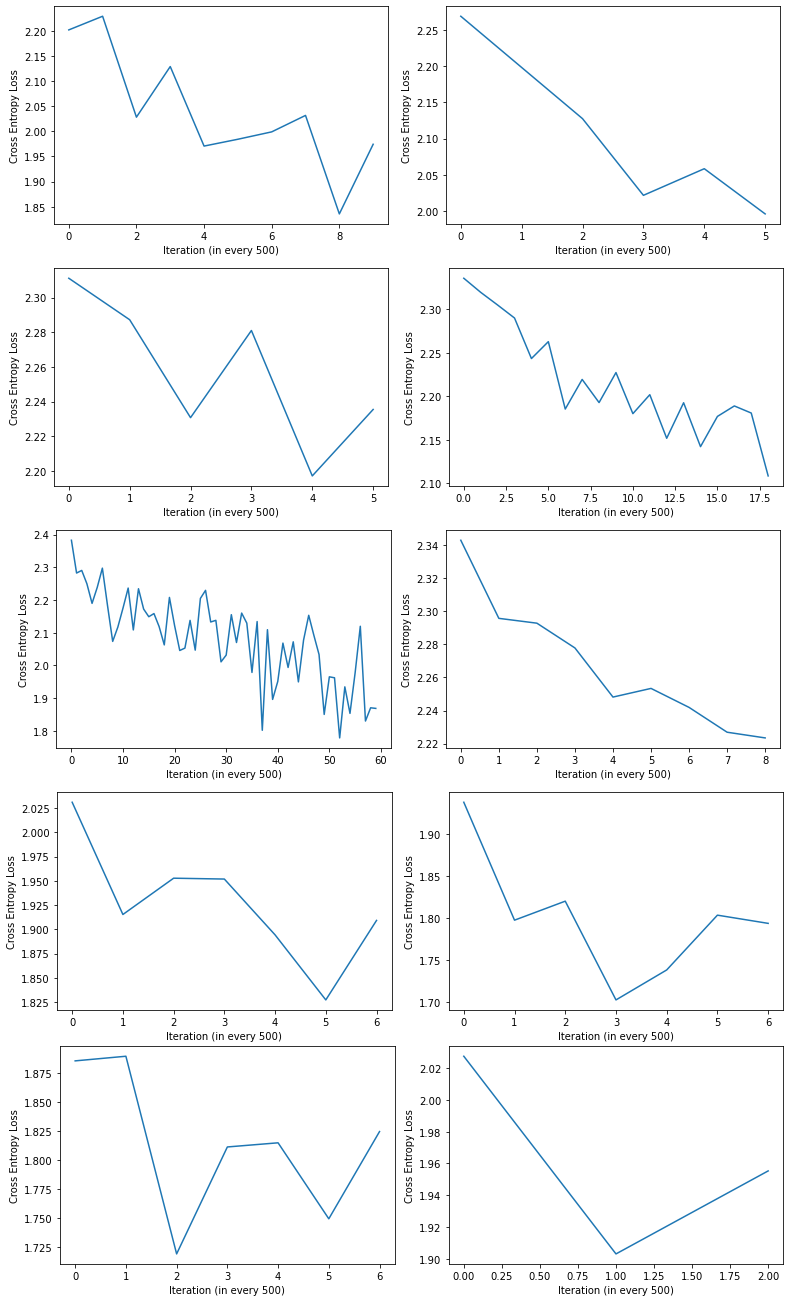